In [1]:
import pandas as pd
import numpy as np
import configparser
import seaborn as sns
import matplotlib.pyplot as plt
#import upsetplot
sns.set_style("ticks")
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('./config.cfg')
DataTest = pd.read_csv(config['FILES']['TEST'])
DataTestLabels = pd.read_csv(config['FILES']['LABEL'])

In [3]:
DataTestWithLabels=pd.merge(DataTest, DataTestLabels, on=['id'])
DataTestWithLabels= pd.DataFrame(DataTestWithLabels)
DataTestWithLabels=DataTestWithLabels.replace(-1,1)

In [4]:
DataTestWithLabels.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,0.622052,0.584687,0.606389,0.583668,0.604666,0.586939
std,0.484876,0.492778,0.488552,0.492951,0.488924,0.492385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


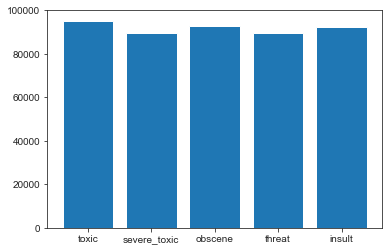

In [5]:
plt.bar(DataTestWithLabels.columns.values[2:-1], [sum(DataTestWithLabels[column]) for column in DataTestWithLabels.columns.values[2:-1]])
sns.set_style('whitegrid')
plt.show()

In [6]:
DataTestWithLabels['comment_length']=DataTestWithLabels['comment_text'].apply(lambda x: len(str(x).split()))

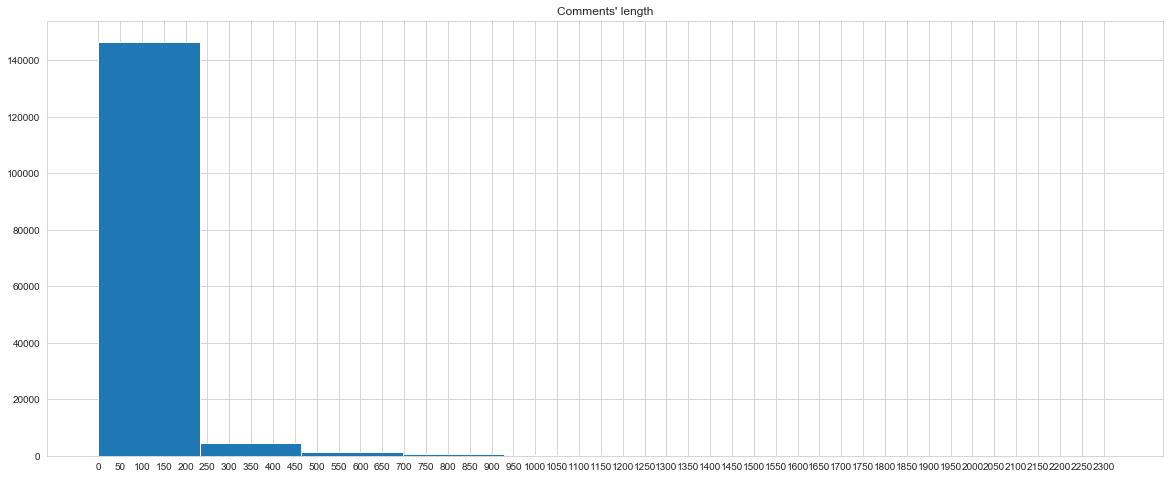

In [7]:
plt.figure(figsize=(20, 8))
DataTestWithLabels['comment_length'].hist()
plt.title('Comments\' length')
plt.xticks(np.arange(min(DataTestWithLabels['comment_length']), max(DataTestWithLabels['comment_length']), 50))
plt.show()

In [8]:
Toxic = DataTestWithLabels[DataTestWithLabels["toxic"]==1]
SevereToxic = DataTestWithLabels[DataTestWithLabels["severe_toxic"]==1]
Obscene = DataTestWithLabels[DataTestWithLabels["obscene"]==1]
IdentityHate = DataTestWithLabels[DataTestWithLabels["identity_hate"]==1]
Threat = DataTestWithLabels[DataTestWithLabels["threat"]==1]
Insult = DataTestWithLabels[DataTestWithLabels["insult"]==1]

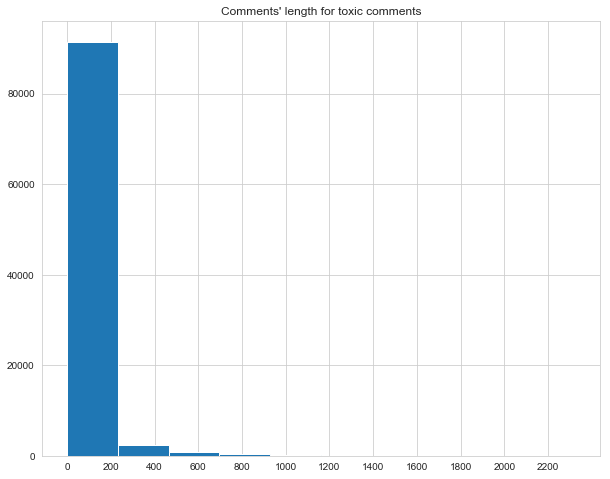

In [9]:
plt.figure(figsize=(10, 8))
Toxic['comment_length'].hist()
plt.title('Comments\' length for toxic comments')
plt.xticks(np.arange(min(Toxic['comment_length']), max(Toxic['comment_length']), 200))
plt.show()

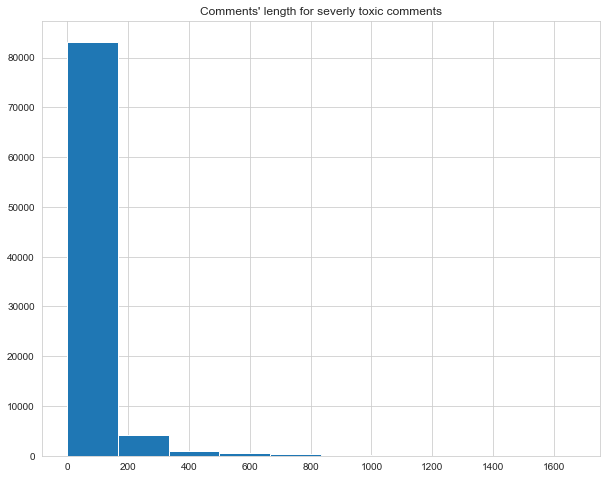

In [10]:
plt.figure(figsize=(10, 8))
SevereToxic['comment_length'].hist()
plt.title('Comments\' length for severly toxic comments')
plt.xticks(np.arange(min(SevereToxic['comment_length']), max(SevereToxic['comment_length']), 200))
plt.show()

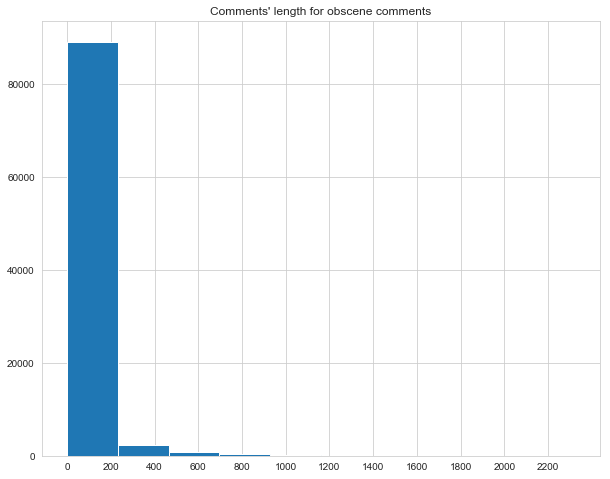

In [11]:
plt.figure(figsize=(10, 8))
Obscene['comment_length'].hist()
plt.title('Comments\' length for obscene comments')
plt.xticks(np.arange(min(Obscene['comment_length']), max(Obscene['comment_length']), 200))
plt.show()

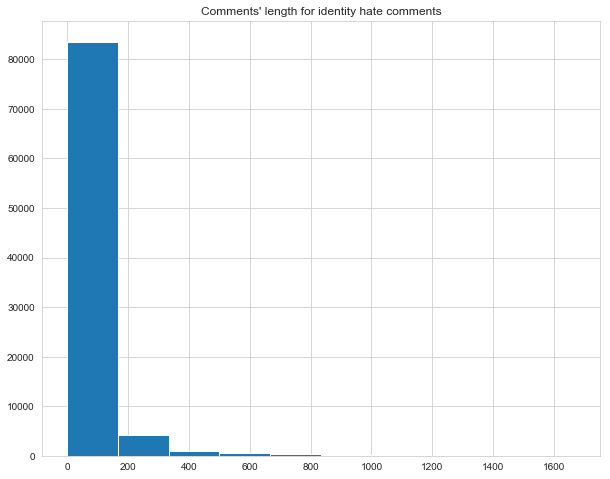

In [12]:
plt.figure(figsize=(10, 8))
IdentityHate['comment_length'].hist()
plt.title('Comments\' length for identity hate comments')
plt.xticks(np.arange(min(IdentityHate['comment_length']), max(IdentityHate['comment_length']), 200))
sns.set_style('darkgrid')
plt.show()

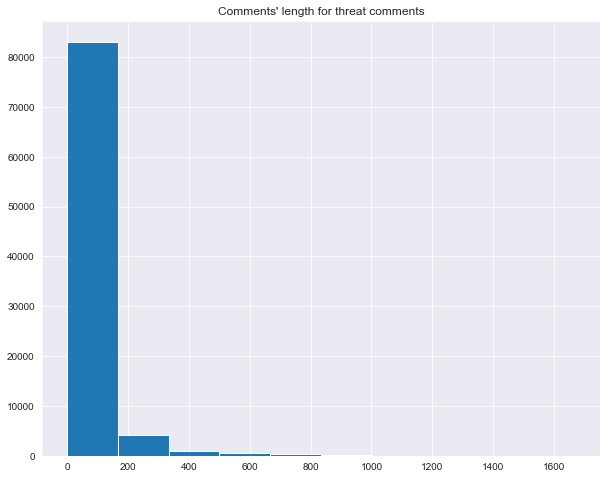

In [13]:
plt.figure(figsize=(10, 8))
Threat['comment_length'].hist()
plt.title('Comments\' length for threat comments')
plt.xticks(np.arange(min(Threat['comment_length']), max(Threat['comment_length']), 200))
plt.show()

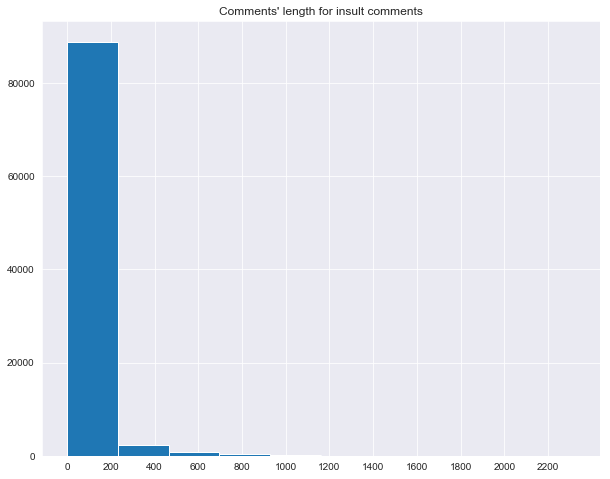

In [14]:
plt.figure(figsize=(10, 8))
Insult['comment_length'].hist()
plt.title('Comments\' length for insult comments')
plt.xticks(np.arange(min(Insult['comment_length']), max(Insult['comment_length']), 200))
plt.show()

In [15]:
ToxicComments = DataTestWithLabels["comment_text"][DataTestWithLabels["toxic"]==1]
SevereToxicComments = DataTestWithLabels["comment_text"][DataTestWithLabels["severe_toxic"]==1]
ObsceneComments = DataTestWithLabels["comment_text"][DataTestWithLabels["obscene"]==1]
IdentityHateComments = DataTestWithLabels["comment_text"][DataTestWithLabels["identity_hate"]==1]
ThreatComments = DataTestWithLabels["comment_text"][DataTestWithLabels["threat"]==1]
InsultComments = DataTestWithLabels["comment_text"][DataTestWithLabels["insult"]==1]

0         [Yo, bitch, Ja, Rule, is, more, succesful, the...
1         [==, From, RfC, ==, The, title, is, fine, as, ...
2         [", ==, Sources, ==, *, Zawe, Ashton, on, Lapl...
3         [:If, you, have, a, look, back, at, the, sourc...
4         [I, don't, anonymously, edit, articles, at, all.]
6         [Please, do, not, add, nonsense, to, Wikipedia...
8         [", Only, a, fool, can, believe, in, such, num...
9         [==, Double, Redirects, ==, When, fixing, doub...
10        [I, think, its, crap, that, the, link, to, rog...
12        [,, 25, February, 2010, (UTC), :::Looking, it,...
15        [==Current, Position==, Anyone, have, confirma...
18        [::, Wallamoose, was, changing, the, cited, ma...
20        [==Indefinitely, blocked==, I, have, indefinit...
21        [==, Arabs, are, committing, genocide, in, Ira...
24        [:yeah,, thanks, for, reviving, the, tradition...
25        [MLM, Software,NBFC, software,Non, Banking, Fi...
27        [====================, Decepti

In [ ]:
import collections
StopWords = pd.read_csv(config['FILES']['STOPWORDS'])
stopwords = set(line.strip() for line in StopWords)
stopwords = stopwords.union(set(['a', 'i', 'mr', 'ms', 'mrs', 'one', 'two', 'said']))
wordcount = collections.defaultdict(int)
""" 
the next paragraph does all the counting and is the main point of difference from the original article. More on this is explained later.
"""
# \W is regex for characters that are not alphanumerics.
# all non-alphanumerics are replaced with a blank space using re.sub
pattern = r"\W"

for word in ToxicComments.apply(lambda x: str(x).split()):
    word = re.sub(pattern, '', word)
    if word not in stopwords:
        wordcount[word] += 1
# printing most common words
to_print = int(input("How many top words do you wish to print?"))
print(f"The most common {n} words are:")
# the next line sorts the default dict on the values in decreasing  # order and prints the first "to_print".
mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)

for word, count in mc:
    print(word, ":", count)
# Draw the bart chart
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
plt.savefig('bar.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'stopwords.txt'

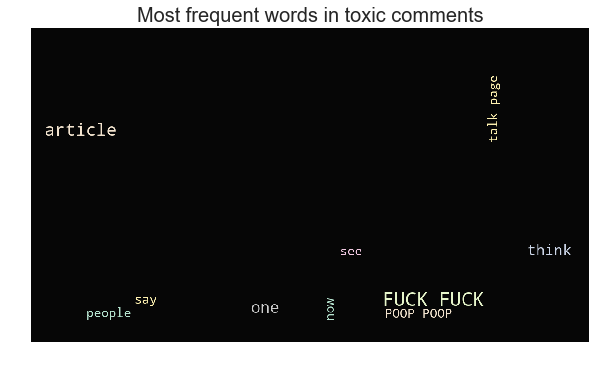

In [20]:
from PIL import Image
import requests
from io import BytesIO
response = requests.get("http://blog.tnsemployeeinsights.com/wp-content/uploads/2015/01/toxic.jpg")
img = Image.open(BytesIO(response.content))
wave_mask = np.array(img)
wc = WordCloud(background_color="black", max_words=10, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(ToxicComments))
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in toxic comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

In [23]:
wc.to_array()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

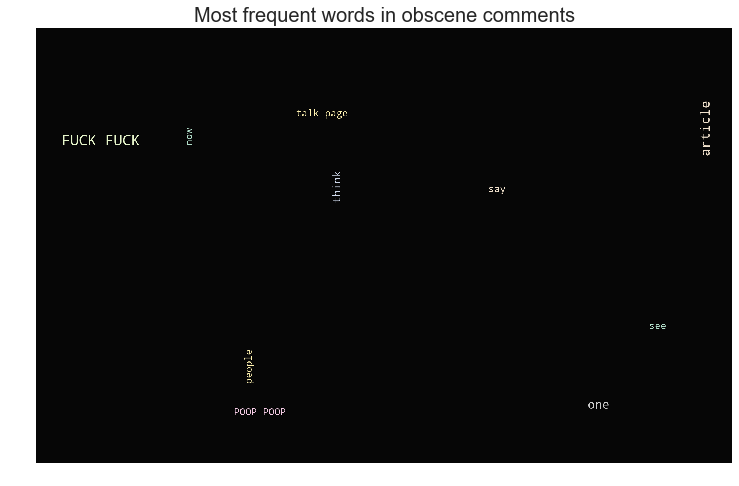

In [21]:
from PIL import Image
import requests
from io import BytesIO
response = requests.get("http://awetimes.com/uploads/posts/2016-03/1457594800_toxic-wallpaper.jpg")
img = Image.open(BytesIO(response.content))
wave_mask = np.array(img)
wc = WordCloud(background_color="black", max_words=10, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(ObsceneComments))
plt.figure(figsize=(16, 8))
plt.title("Most frequent words in obscene comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

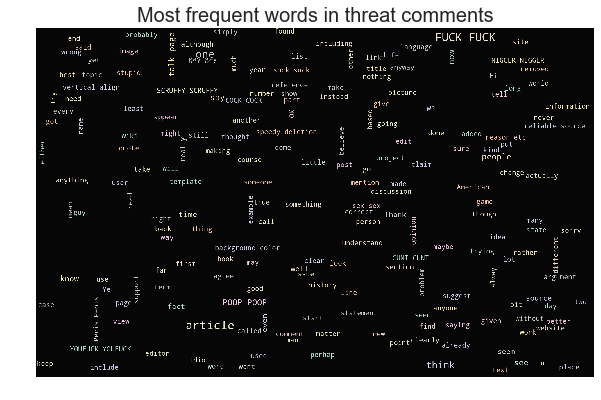

In [55]:
from PIL import Image
import requests
from io import BytesIO
response = requests.get("http://awetimes.com/uploads/posts/2016-03/1457594800_toxic-wallpaper.jpg")
img = Image.open(BytesIO(response.content))
wave_mask = np.array(img)
wc = WordCloud(background_color="black", max_words=200, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(ThreatComments))
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in threat comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()